### importing routines

In [1]:
%matplotlib inline
%run importing_routines.ipynb
from __future__ import print_function, division, absolute_import

In [2]:
mpl.rcParams.update(rcParams)

&nbsp;
# Quadratic potential

## uniform in $\phi$

In [3]:
def plot_m2phi2_uniphi(num=32, params=['m2phi2', 0.1]):
    ax = plt.gca()
    ax.set_xlabel("$\sqrt{2}m\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_ylabel("$\dot\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_aspect('equal')
    ax.set_xlim(-1.6, 1.6)
    ax.set_ylim(-1.6, 1.6)

    phi_max = MP**2 / params[1] - 1e-5
    phi = np.linspace(-phi_max, phi_max, num + 1)[1:]
    for i, phi0 in enumerate(phi):
        print("m2phi2_uniphi %d of %d" % (i+1, len(phi)), end='\r')
        a0 = 1.
        dphi0 = np.sqrt(2 * MP**4 - 2 * params[1]**2 * phi0**2)
        y0 = np.array([a0, phi0, dphi0])
        t_start = np.abs(np.sqrt(2. / 3.) * MP / dphi0)
        t0 = np.logspace(np.log10(t_start), 6, 1000)
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi * bkdt1.m * np.sqrt(2),  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        ax.plot(-bkdt1.phi * bkdt1.m * np.sqrt(2), -bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)

    mphi_circ = np.linspace(-np.sqrt(2), np.sqrt(2), 201)
    dphi_circ = np.zeros_like(mphi_circ)
    dphi_circ[1:-1] = np.sqrt(2. * MP**4 - mphi_circ[1:-1]**2)
    ax.plot(mphi_circ, dphi_circ, ls=':', c=basecolor)
    ax.plot(mphi_circ,-dphi_circ, ls=':', c=basecolor)
    mphi_crss = 2 / np.sqrt(3) * MP**2
    mphi_fill_0 = np.array([-mphi_crss, 0, mphi_crss])
    mphi_fill_1 = np.linspace(mphi_crss, np.sqrt(2), 100)
    dphi_fill_0 = mphi_fill_0 / np.sqrt(2)
    dphi_fill_1 = np.zeros_like(mphi_fill_1)
    dphi_fill_1[:-1] = np.sqrt(2. * MP**4 - mphi_fill_1[:-1]**2)
    mphi_fill = np.concatenate((-mphi_fill_1[::-1][:-1], mphi_fill_0, mphi_fill_1[1:]))
    dphi_fill = np.concatenate((-dphi_fill_1[::-1][:-1], dphi_fill_0, dphi_fill_1[1:]))
    dphi_kd = np.abs(10 * mphi_circ / np.sqrt(2))
    ax.fill_between(mphi_fill,-dphi_fill, dphi_fill, color=cSR_m2phi2)
    ax.fill_between(mphi_circ, dphi_kd, dphi_circ, where=dphi_kd < dphi_circ, color=cKD_m2phi2)
    ax.fill_between(mphi_circ,-dphi_kd,-dphi_circ, where=dphi_kd < dphi_circ, color=cKD_m2phi2)

&nbsp;
## logarithmic in $\phi$

In [4]:
def plot_m2phi2_logphi(num=16, params=['m2phi2', 0.1]):
    ax = plt.gca()
    ax.set_xlabel("$\sqrt{2}m\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_ylabel("$\dot\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_aspect('equal')
    ax.set_xlim(-1.6, 1.6)
    ax.set_ylim(-1.6, 1.6)

    phi_max = MP**2 / params[1] - 1e-5
    phi = np.logspace(-1.2, np.log10(phi_max), num + 1)
    phi = np.logspace(np.log10(1e-4 * phi_max), np.log10(phi_max), num + 1)
    for i, phi0 in enumerate(phi):
        print("m2phi2_logphi %d of %d" % (i+1, len(phi)), end='\r')
        a0 = 1.
        dphi0 = np.sqrt(2 * MP**4 - 2 * params[1]**2 * phi0**2)
        y0 = np.array([a0, phi0, dphi0])
        t_start = np.abs(np.sqrt(2. / 3.) * MP / dphi0)
        t0 = np.logspace(np.log10(t_start), 6, 1000)
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi * np.sqrt(2) * bkdt1.m,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        ax.plot(-bkdt1.phi * np.sqrt(2) * bkdt1.m, -bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        if i < num:
            y0[-1] *= -1
            bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
            ax.plot( bkdt1.phi * np.sqrt(2) * bkdt1.m,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
            ax.plot(-bkdt1.phi * np.sqrt(2) * bkdt1.m, -bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)

    mphi_circ = np.linspace(-np.sqrt(2), np.sqrt(2), 201)
    dphi_circ = np.zeros_like(mphi_circ)
    dphi_circ[1:-1] = np.sqrt(2. * MP**4 - mphi_circ[1:-1]**2)
    ax.plot(mphi_circ, dphi_circ, ls=':', c=basecolor)
    ax.plot(mphi_circ,-dphi_circ, ls=':', c=basecolor)
    mphi_crss = 2 / np.sqrt(3) * MP**2
    mphi_fill_0 = np.array([-mphi_crss, 0, mphi_crss])
    mphi_fill_1 = np.linspace(mphi_crss, np.sqrt(2), 100)
    dphi_fill_0 = mphi_fill_0 / np.sqrt(2)
    dphi_fill_1 = np.zeros_like(mphi_fill_1)
    dphi_fill_1[:-1] = np.sqrt(2. * MP**4 - mphi_fill_1[:-1]**2)
    mphi_fill = np.concatenate((-mphi_fill_1[::-1][:-1], mphi_fill_0, mphi_fill_1[1:]))
    dphi_fill = np.concatenate((-dphi_fill_1[::-1][:-1], dphi_fill_0, dphi_fill_1[1:]))
    dphi_kd = np.abs(10 * mphi_circ / np.sqrt(2))
    ax.fill_between(mphi_fill,-dphi_fill, dphi_fill, color=cSR_m2phi2)
    ax.fill_between(mphi_circ, dphi_kd, dphi_circ, where=dphi_kd < dphi_circ, color=cKD_m2phi2)
    ax.fill_between(mphi_circ,-dphi_kd,-dphi_circ, where=dphi_kd < dphi_circ, color=cKD_m2phi2)

&nbsp;
## uniform in energy

In [5]:
def plot_m2phi2_unieng(num=16, params=['m2phi2', 0.1]):
    ax = plt.gca()
    ax.set_xlabel("$\sqrt{2}m\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_ylabel("$\dot\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_aspect('equal')
    ax.set_xlim(-1.6, 1.6)
    ax.set_ylim(-1.6, 1.6)

    Ekin = np.linspace(1e-5, 1, num + 1)
    for i, Ekin0 in enumerate(Ekin):
        print("m2phi2_unieng %d of %d" % (i+1, len(Ekin)), end='\r')
        a0 = 1.
        phi0 = np.sqrt(2 * MP**4 - 2 * Ekin0) / params[1]
        dphi0 = np.sqrt(2 * Ekin0)
        y0 = np.array([a0, phi0, dphi0])
        t_start = np.abs(np.sqrt(2. / 3.) * MP / dphi0)
        t0 = np.logspace(np.log10(t_start), 6, 1000)
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi * bkdt1.m,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        if abs(Ekin0) < 0.999:
            ax.plot(-bkdt1.phi * bkdt1.m, -bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        y0[-1] *= -1
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        if abs(Ekin0) > 0.001:
            ax.plot( bkdt1.phi * bkdt1.m,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        if 0.001 < abs(Ekin0) < 0.999:
            ax.plot(-bkdt1.phi * bkdt1.m, -bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)

    mphi_circ = np.linspace(-np.sqrt(2), np.sqrt(2), 201)
    dphi_circ = np.zeros_like(mphi_circ)
    dphi_circ[1:-1] = np.sqrt(2. * MP**4 - mphi_circ[1:-1]**2)
    ax.plot(mphi_circ, dphi_circ, ls=':', c=basecolor)
    ax.plot(mphi_circ,-dphi_circ, ls=':', c=basecolor)
    mphi_crss = 2 / np.sqrt(3) * MP**2
    mphi_fill_0 = np.array([-mphi_crss, 0, mphi_crss])
    mphi_fill_1 = np.linspace(mphi_crss, np.sqrt(2), 100)
    dphi_fill_0 = mphi_fill_0 / np.sqrt(2)
    dphi_fill_1 = np.zeros_like(mphi_fill_1)
    dphi_fill_1[:-1] = np.sqrt(2. * MP**4 - mphi_fill_1[:-1]**2)
    mphi_fill = np.concatenate((-mphi_fill_1[::-1][:-1], mphi_fill_0, mphi_fill_1[1:]))
    dphi_fill = np.concatenate((-dphi_fill_1[::-1][:-1], dphi_fill_0, dphi_fill_1[1:]))
    dphi_kd = np.abs(10 * mphi_circ / np.sqrt(2))
    ax.fill_between(mphi_fill,-dphi_fill, dphi_fill, color=cSR_m2phi2)
    ax.fill_between(mphi_circ, dphi_kd, dphi_circ, where=dphi_kd < dphi_circ, color=cKD_m2phi2)
    ax.fill_between(mphi_circ,-dphi_kd,-dphi_circ, where=dphi_kd < dphi_circ, color=cKD_m2phi2)

&nbsp;
# Starobinsky potential

## uniform in $\phi$

In [6]:
def plot_starob_uniphi(num=32, params=['starobinsky', 0.1], phi_max=9):
    phi_min = - np.sqrt(3. / 2.) * np.log(1 + MP**2 / params[1])
    Pot = InflationaryPotential(params)

    ax = plt.gca()
    ax.set_xlabel("$\phi(t)~/~\mathrm{m_p}$")
    ax.set_ylabel("$\dot\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_xlim(np.floor(phi_min) - 0.5, phi_max)
    ax.set_xticks(np.arange(-2, 9, 2))

    phi = np.linspace(phi_min + 1e-3, phi_max, num + 1)
    for i, phi0 in enumerate(phi):
        print("starob_uniphi %d of %d" % (i+1, len(phi)), end='\r')
        a0 = 1.
        dphi0 = np.sqrt(2 * MP**4 - 2 * Pot.V(phi0))
        y0 = np.array([a0, phi0, dphi0])
        t_start = np.abs(np.sqrt(2. / 3.) * MP / dphi0)
        t0 = np.logspace(np.log10(t_start), 8, 1000)
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        if phi0 > phi_min + 1e-3:
            y0[-1] *= -1
            bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
            ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)

    phi_circ = np.concatenate((np.linspace(phi_min + 1e-5, 0, 400), np.linspace(0, ax.get_xlim()[1], 100)[1:]))
    dphi_circ = np.sqrt(2 * MP**4 - 2 * Pot.V(phi_circ))
    ax = plt.gca()
    ax.plot(phi_circ, dphi_circ, ls=':', c=basecolor)
    ax.plot(phi_circ,-dphi_circ, ls=':', c=basecolor)
    dphi_infl = np.sqrt(Pot.V(phi_circ))
    dphi_fill = np.min((dphi_circ, dphi_infl), axis=0)
    dphi_kd = np.sqrt(100 * Pot.V(phi_circ))
    ax.fill_between(phi_circ, dphi_kd, dphi_circ, where=dphi_kd < dphi_circ, color=cKD_starob)
    ax.fill_between(phi_circ,-dphi_kd,-dphi_circ, where=dphi_kd < dphi_circ, color=cKD_starob)
    ax.fill_between(phi_circ, -dphi_fill, dphi_fill, color=cSR_starob)

&nbsp;
## logarithmic in $\phi$

In [7]:
def plot_starob_logphi(num=16, params=['starobinsky', 0.1], phi_max=9):
    phi_min = - np.sqrt(3. / 2.) * np.log(1 + MP**2 / params[1])
    Pot = InflationaryPotential(params)

    ax = plt.gca()
    ax.set_xlabel("$\phi(t)~/~\mathrm{m_p}$")
    ax.set_ylabel("$\dot\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_xlim(np.floor(phi_min) - 0.5, phi_max)
    ax.set_xticks(np.arange(-2, 9, 2))

    phi_pos =  np.logspace(-1.6, np.log10(phi_max), num)
    phi_neg = -np.logspace(-1.6, np.log10(np.abs(phi_min + 1e-2)), num + 1)
    phi = np.concatenate((phi_neg[::-1], phi_pos))
    for i, phi0 in enumerate(phi):
        print("starob_logphi %d of %d" % (i+1, len(phi)), end='\r')
        a0 = 1.
        dphi0 = np.sqrt(2 * MP**4 - 2 * Pot.V(phi0))
        y0 = np.array([a0, phi0, dphi0])
        t_start = np.abs(np.sqrt(2. / 3.) * MP / dphi0)
        t0 = np.logspace(np.log10(t_start), 8, 1000)
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        if phi0 > phi_min + 1e-2:
            y0[-1] *= -1
            bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
            ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)

    phi_circ = np.concatenate((np.linspace(phi_min + 1e-5, 0, 400), np.linspace(0, ax.get_xlim()[1], 100)[1:]))
    dphi_circ = np.sqrt(2 * MP**4 - 2 * Pot.V(phi_circ))
    ax = plt.gca()
    ax.plot(phi_circ, dphi_circ, ls=':', c=basecolor)
    ax.plot(phi_circ,-dphi_circ, ls=':', c=basecolor)
    dphi_infl = np.sqrt(Pot.V(phi_circ))
    dphi_fill = np.min((dphi_circ, dphi_infl), axis=0)
    dphi_kd = np.sqrt(100 * Pot.V(phi_circ))
    ax.fill_between(phi_circ, dphi_kd, dphi_circ, where=dphi_kd < dphi_circ, color=cKD_starob, label="$\dot\phi^2 > 100\ V(\phi)$")
    ax.fill_between(phi_circ,-dphi_kd,-dphi_circ, where=dphi_kd < dphi_circ, color=cKD_starob)
    ax.fill_between(phi_circ, -dphi_fill, dphi_fill, color=cSR_starob, label="$\dot\phi^2 < V(\phi)$")

&nbsp;
## uniform in energy

In [8]:
def plot_starob_unieng(num=32, params=['starobinsky', 0.1], phi_max=9):
    phi_min = - np.sqrt(3. / 2.) * np.log(1 + MP**2 / params[1])
    Pot = InflationaryPotential(params)

    ax = plt.gca()
    ax.set_xlabel("$\phi(t)~/~\mathrm{m_p}$")
    ax.set_ylabel("$\dot\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_xlim(np.floor(phi_min) - 0.5, phi_max)
    ax.set_xticks(np.arange(-2, 9, 2))

    E = np.linspace(-params[1]**2 + 3e-5, MP**4, num + 1)
    Epot1 = -E[np.where(E <  0)[0]]
    Epot2 =  E[np.where(E >= 0)[0]]
    Ekin = MP**4 - Epot2
    if Ekin[0] == 0.:
        Ekin[0] = 1e-3
    elif Ekin[-1] == 0.:
        Ekin[-1] = 1e-3
    for i, Ekin0 in enumerate(Ekin):
        print("starob_unieng %d of %d" % (i+1, len(Epot1)+len(Epot2)), end='\r')
        a0 = 1.
        phi0 = - np.sqrt(3. / 2.) * MP * np.log(1. + np.sqrt(MP**4 - Ekin0) / params[1])        
        dphi0 = np.sqrt(2 * Ekin0)
        y0 = np.array([a0, phi0, dphi0])
        t_start = np.abs(np.sqrt(2. / 3.) * MP / dphi0)
        t0 = np.logspace(np.log10(t_start), 8, 3000)
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        y0[-1] *= -1
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)

    Ekin = MP**4 - Epot1
    for j, Ekin0 in enumerate(Ekin):
        print("starob_unieng %d of %d" % (i+j+2, len(Epot1)+len(Epot2)), end='\r')
        a0 = 1.
        phi0 = - np.sqrt(3. / 2.) * MP * np.log(1. - np.sqrt(MP**4 - Ekin0) / params[1])        
        dphi0 = np.sqrt(2 * Ekin0)
        y0 = np.array([a0, phi0, dphi0])
        t_start = np.abs(np.sqrt(2. / 3.) * MP / dphi0)
        t0 = np.logspace(np.log10(t_start), 8, 3000)
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        y0[-1] *= -1
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)

    phi_circ = np.concatenate((np.linspace(phi_min + 1e-5, 0, 400), np.linspace(0, ax.get_xlim()[1], 100)[1:]))
    dphi_circ = np.sqrt(2 * MP**4 - 2 * Pot.V(phi_circ))
    ax = plt.gca()
    ax.plot(phi_circ, dphi_circ, ls=':', c=basecolor)
    ax.plot(phi_circ,-dphi_circ, ls=':', c=basecolor)
    dphi_infl = np.sqrt(Pot.V(phi_circ))
    dphi_fill = np.min((dphi_circ, dphi_infl), axis=0)
    dphi_kd = np.sqrt(100 * Pot.V(phi_circ))
    ax.fill_between(phi_circ, dphi_kd, dphi_circ, where=dphi_kd < dphi_circ, color=cKD_starob)
    ax.fill_between(phi_circ,-dphi_kd,-dphi_circ, where=dphi_kd < dphi_circ, color=cKD_starob)
    ax.fill_between(phi_circ, -dphi_fill, dphi_fill, color=cSR_starob)

&nbsp;
# Double-Well potential

## uniform in $\phi$

In [9]:
def plot_dbwell_uniphi(num=32, params=['hilltop', 0.1, 5]):
    Pot = InflationaryPotential(params)

    ax = plt.gca()
    ax.set_xlabel("$\phi(t)~/~\mathrm{m_p}$")
    ax.set_ylabel("$\dot\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_xticks(np.arange(-15, 16, 5))

    phi_max = params[2] * np.sqrt(1 + MP**2 / params[1])
    phi = np.linspace(-phi_max + 1e-3, phi_max - 1e-3, num + 1)
    for i, phi0 in enumerate(phi):
        print("dbwell_uniphi %d of %d" % (i+1, len(phi)), end='\r')
        a0 = 1.
        dphi0 = np.sqrt(2 * MP**4 - 2 * Pot.V(phi0))
        y0 = np.array([a0, phi0, dphi0])
        t_start = np.abs(np.sqrt(2. / 3.) * MP / dphi0)
        t0 = np.logspace(np.log10(t_start), 8, 1000)
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        ax.plot(-bkdt1.phi, -bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)

    phi_circ = np.linspace(-phi_max, phi_max, 400 + 1)
    dphi_circ = np.sqrt(2 * MP**4 - 2 * Pot.V(phi_circ))
    ax = plt.gca()
    ax.plot(phi_circ, dphi_circ, ls=':', c=basecolor)
    ax.plot(phi_circ,-dphi_circ, ls=':', c=basecolor)
    dphi_infl = np.sqrt(Pot.V(phi_circ))
    dphi_fill = np.min((dphi_circ, dphi_infl), axis=0)
    dphi_kd = np.sqrt(100 * Pot.V(phi_circ))
    ax.fill_between(phi_circ, dphi_kd, dphi_circ, where=dphi_kd < dphi_circ, color=cKD_dbwell)
    ax.fill_between(phi_circ,-dphi_kd,-dphi_circ, where=dphi_kd < dphi_circ, color=cKD_dbwell)
    ax.fill_between(phi_circ, -dphi_fill, dphi_fill, color=cSR_dbwell);

&nbsp;
## logarithmic in $\phi$

In [10]:
def plot_dbwell_logphi(num=16, params=['hilltop', 0.1, 5]):
    Pot = InflationaryPotential(params)

    ax = plt.gca()
    ax.set_xlabel("$\phi(t)~/~\mathrm{m_p}$")
    ax.set_ylabel("$\dot\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_xticks(np.arange(-15, 16, 5))

    phi_max = params[2] * np.sqrt(1 + MP**2 / params[1])
    phi_pos =  np.logspace(-1.6, np.log10(phi_max - 1e-3), num)
    phi = np.concatenate((-phi_pos[::-1], phi_pos))
    for i, phi0 in enumerate(phi):
        print("dbwell_logphi %d of %d" % (i+1, len(phi)), end='\r')
        a0 = 1.
        dphi0 = np.sqrt(2 * MP**4 - 2 * Pot.V(phi0))
        y0 = np.array([a0, phi0, dphi0])
        t_start = np.abs(np.sqrt(2. / 3.) * MP / dphi0)
        t0 = np.logspace(np.log10(t_start), 8, 1000)
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        ax.plot(-bkdt1.phi, -bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)

    phi_circ = np.linspace(-phi_max, phi_max, 400 + 1)
    dphi_circ = np.sqrt(2 * MP**4 - 2 * Pot.V(phi_circ))
    ax = plt.gca()
    ax.plot(phi_circ, dphi_circ, ls=':', c=basecolor)
    ax.plot(phi_circ,-dphi_circ, ls=':', c=basecolor)

    dphi_infl = np.sqrt(Pot.V(phi_circ))
    dphi_fill = np.min((dphi_circ, dphi_infl), axis=0)
    dphi_kd = np.sqrt(100 * Pot.V(phi_circ))
    ax.fill_between(phi_circ, dphi_kd, dphi_circ, where=dphi_kd < dphi_circ, color=cKD_dbwell)
    ax.fill_between(phi_circ,-dphi_kd,-dphi_circ, where=dphi_kd < dphi_circ, color=cKD_dbwell)
    ax.fill_between(phi_circ, -dphi_fill, dphi_fill, color=cSR_dbwell);

&nbsp;
## uniform in energy

In [11]:
def plot_dbwell_unieng(num=16, params=['hilltop', 0.1, 5]):
    phi_max = params[2] * np.sqrt(1 + MP**2 / params[1])
    Pot = InflationaryPotential(params)

    ax = plt.gca()
    ax.set_xlabel("$\phi(t)~/~\mathrm{m_p}$")
    ax.set_ylabel("$\dot\phi(t)~/~\mathrm{m_p^2}$")
    ax.set_xticks(np.arange(-15, 16, 5))

    E = np.linspace(-params[1]**2 + 3e-5, MP**4, num + 1)
    Epot1 = -E[np.where(E <  0)[0]]
    Epot2 =  E[np.where(E >= 0)[0]]
    Ekin = MP**4 - Epot2
    if Ekin[0] == 0.:
        Ekin[0] = 1e-3
    elif Ekin[-1] == 0.:
        Ekin[-1] = 1e-3
    for i, Ekin0 in enumerate(Ekin):
        print("dbwell_unieng %d of %d" % (i+1, len(Epot1)+len(Epot2)), end='\r')
        a0 = 1.
        phi0 = - params[2] * np.sqrt(1. + np.sqrt(MP**4 - Ekin0) / params[1])   
        dphi0 = np.sqrt(2 * MP**4 - 2 * Pot.V(phi0))
        y0 = np.array([a0, phi0, dphi0])
        t_start = np.abs(np.sqrt(2. / 3.) * MP / dphi0)
        t0 = np.logspace(np.log10(t_start), 8, 1000)
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        ax.plot(-bkdt1.phi, -bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        y0[-1] *= -1
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        ax.plot( -bkdt1.phi, -bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)

    Ekin = MP**4 - Epot1
    for j, Ekin0 in enumerate(Ekin):
        print("dbwell_unieng %d of %d" % (i+j+2, len(Epot1)+len(Epot2)), end='\r')
        a0 = 1.
        phi0 = - params[2] * np.sqrt(1. - np.sqrt(MP**4 - Ekin0) / params[1])   
        dphi0 = np.sqrt(2 * MP**4 - 2 * Pot.V(phi0))
        y0 = np.array([a0, phi0, dphi0])
        t_start = np.abs(np.sqrt(2. / 3.) * MP / dphi0)
        t0 = np.logspace(np.log10(t_start), 8, 1000)
        bkdt1 = InflatonSolver('time', t0, params,  y0, N_star=0, verbose=False, do_interval=False, integrator='vode')
        ax.plot( bkdt1.phi,  bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)
        ax.plot(-bkdt1.phi, -bkdt1.dphidt, c=basecolor, alpha=0.5, lw=1)

    phi_circ = np.linspace(-phi_max, phi_max, 400 + 1)
    dphi_circ = np.sqrt(2 * MP**4 - 2 * Pot.V(phi_circ))
    ax = plt.gca()
    ax.plot(phi_circ, dphi_circ, ls=':', c=basecolor)
    ax.plot(phi_circ,-dphi_circ, ls=':', c=basecolor)
    dphi_infl = np.sqrt(Pot.V(phi_circ))
    dphi_fill = np.min((dphi_circ, dphi_infl), axis=0)
    dphi_kd = np.sqrt(100 * Pot.V(phi_circ))
    ax.fill_between(phi_circ, dphi_kd, dphi_circ, where=dphi_kd < dphi_circ, color=cKD_dbwell)
    ax.fill_between(phi_circ,-dphi_kd,-dphi_circ, where=dphi_kd < dphi_circ, color=cKD_dbwell)
    ax.fill_between(phi_circ, -dphi_fill, dphi_fill, color=cSR_dbwell);

&nbsp;
# Trajectories plot

In [12]:
params_m2phi2 = ['m2phi2', 0.1]
params_starob = ['starobinsky', 0.1]
params_dbwell = ['hilltop', 0.1, 5]

/scratch/.virtualenvs/py27env/lib/python2.7/site-packages/scipy/integrate/_ode.py:1009: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))


m2phi2_uniphi 32 of 32
m2phi2_logphi 17 of 17
m2phi2_unieng 17 of 17


/scratch/.virtualenvs/py27env/lib/python2.7/site-packages/scipy/integrate/_ode.py:1009: UserWarning: vode: Repeated convergence failures. (Perhaps bad Jacobian supplied or wrong choice of MF or tolerances.)
  self.messages.get(istate, unexpected_istate_msg)))


starob_uniphi 33 of 33
starob_logphi 33 of 33
starob_unieng 33 of 33
dbwell_uniphi 33 of 33
dbwell_logphi 32 of 32
dbwell_unieng 17 of 17
CPU times: user 3min 59s, sys: 1.47 s, total: 4min 1s
Wall time: 3min 59s


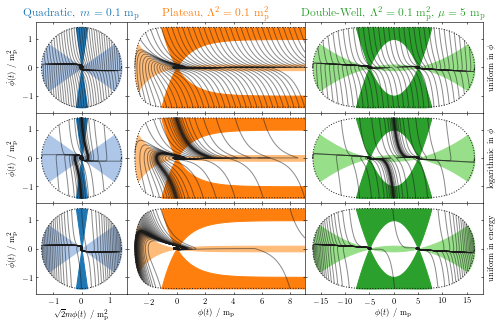

In [13]:
%%time

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 5), gridspec_kw=dict(height_ratios=[1, 1, 1], width_ratios=[1.0, 1.962, 1.962]), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0, wspace=0)

ax[0, 0].set_title("Quadratic,  $m=%.1f~\mathrm{m_p}$"                                    % tuple(params_m2phi2[1:]), color=cKD_m2phi2)
ax[0, 1].set_title("Plateau,  $\Lambda^2=%.1f~\mathrm{m_p^2}$"                            % tuple(params_starob[1:]), color=cKD_starob)
ax[0, 2].set_title("Double-Well,  $\Lambda^2=%.1f~\mathrm{m_p^2}$, $\mu=%d~\mathrm{m_p}$" % tuple(params_dbwell[1:]), color=cKD_dbwell)

plt.sca(ax[0, 0]), plot_m2phi2_uniphi(), print("m2phi2_uniphi")
plt.sca(ax[1, 0]), plot_m2phi2_logphi(), print("m2phi2_logphi")
plt.sca(ax[2, 0]), plot_m2phi2_unieng(), print("m2phi2_unieng")
plt.sca(ax[0, 1]), plot_starob_uniphi(), print("starob_uniphi")
plt.sca(ax[1, 1]), plot_starob_logphi(), print("starob_logphi")
plt.sca(ax[2, 1]), plot_starob_unieng(), print("starob_unieng")
plt.sca(ax[0, 2]), plot_dbwell_uniphi(), print("dbwell_uniphi")
plt.sca(ax[1, 2]), plot_dbwell_logphi(), print("dbwell_logphi")
plt.sca(ax[2, 2]), plot_dbwell_unieng(), print("dbwell_unieng")

for row in range(3):
    for col in range(3):
        if col >= 1:
            ax[row, col].set_ylabel("")
            ax[row, col].tick_params('y', labelleft=False)
        if row < 2:
            ax[row, col].set_xlabel("")
            ax[row, col].tick_params('x', labelbottom=False)

row_title = ["uniform in $\phi$", "logarithmic in $\phi$", "uniform in energy"]
for i, title in enumerate(row_title):
    ax[i, 2].text(x=1.05, y=0.5, s=title, va='center', ha='center', rotation='vertical', transform=ax[i, 2].transAxes);

# fig.savefig("figures/phasespace_trajectories.pdf", bbox_inches='tight');
# fig.savefig("figures/phasespace_trajectories.png", bbox_inches='tight');

In [14]:
phi_m2phi2 = np.linspace(-np.sqrt(2), np.sqrt(2), 101)
phi_starob = np.linspace(-1.1, 8, 100)
phi_dbwell = np.linspace(-7.8, 7.8, 101)

In [15]:
V_m2phi2 = InflationaryPotential(params_m2phi2)
V_starob = InflationaryPotential(params_starob)
V_dbwell = InflationaryPotential(params_dbwell)

m2phi2_uniphi 32 of 32
m2phi2_logphi 17 of 17
m2phi2_unieng 17 of 17
starob_uniphi 33 of 33
starob_logphi 33 of 33
starob_unieng 33 of 33
dbwell_uniphi 33 of 33
dbwell_logphi 32 of 32
dbwell_unieng 17 of 17
CPU times: user 4min 8s, sys: 3.25 s, total: 4min 12s
Wall time: 4min 9s


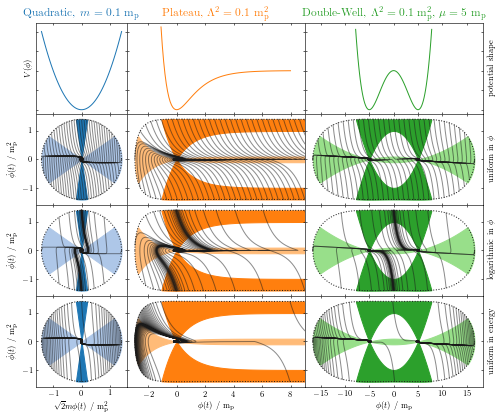

In [17]:
%%time

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(8, 6.7), gridspec_kw=dict(height_ratios=[1, 1, 1, 1], width_ratios=[1.0, 1.962, 1.962]), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0, wspace=0)

ax[0, 0].set_title("Quadratic,  $m=%.1f~\mathrm{m_p}$"                                    % tuple(params_m2phi2[1:]), color=cKD_m2phi2)
ax[0, 1].set_title("Plateau,  $\Lambda^2=%.1f~\mathrm{m_p^2}$"                            % tuple(params_starob[1:]), color=cKD_starob)
ax[0, 2].set_title("Double-Well,  $\Lambda^2=%.1f~\mathrm{m_p^2}$, $\mu=%d~\mathrm{m_p}$" % tuple(params_dbwell[1:]), color=cKD_dbwell)

ax[0, 0].plot(phi_m2phi2, V_m2phi2.V(phi_m2phi2), c=cKD_m2phi2)
ax[0, 1].plot(phi_starob, V_starob.V(phi_starob), c=cKD_starob)
ax[0, 2].plot(phi_dbwell, V_dbwell.V(phi_dbwell), c=cKD_dbwell)
ax[0, 0].set_ylabel("$V(\phi)$")
plt.setp(ax[0, 0].get_yticklabels(), visible=False)

plt.sca(ax[1, 0]), plot_m2phi2_uniphi(), print("m2phi2_uniphi")
plt.sca(ax[2, 0]), plot_m2phi2_logphi(), print("m2phi2_logphi")
plt.sca(ax[3, 0]), plot_m2phi2_unieng(), print("m2phi2_unieng")
plt.sca(ax[1, 1]), plot_starob_uniphi(), print("starob_uniphi")
plt.sca(ax[2, 1]), plot_starob_logphi(), print("starob_logphi")
plt.sca(ax[3, 1]), plot_starob_unieng(), print("starob_unieng")
plt.sca(ax[1, 2]), plot_dbwell_uniphi(), print("dbwell_uniphi")
plt.sca(ax[2, 2]), plot_dbwell_logphi(), print("dbwell_logphi")
plt.sca(ax[3, 2]), plot_dbwell_unieng(), print("dbwell_unieng")

for row in range(4):
    for col in range(3):
        if col >= 1:
            ax[row, col].set_ylabel("")
            ax[row, col].tick_params('y', labelleft=False)
        if row < 3:
            ax[row, col].set_xlabel("")
            ax[row, col].tick_params('x', labelbottom=False)

row_title = ["potential shape", "uniform in $\phi$", "logarithmic in $\phi$", "uniform in energy"]
for i, title in enumerate(row_title):
    ax[i, 2].text(x=1.05, y=0.5, s=title, va='center', ha='center', rotation='vertical', transform=ax[i, 2].transAxes);

fig.savefig("figures/phasespace_trajectories.pdf", bbox_inches='tight');
fig.savefig("figures/phasespace_trajectories.png", bbox_inches='tight');